# Statistika NBA igralcev v sezoni 2017/2018


## Analizo bomo razdelili na dva dela:

* V prvem delu bomo glede na statistiko igralcev naredili celovito analizo.

* V drugem delu bomo vključili podatke o plačah igralcev in poskušali poiskati najbolj zaželjene igralce. 

# Naložili bomo podatke potrebne za prvi del analize.

In [10]:
import pandas as pd
import matplotlib

from matplotlib import pyplot as plt

igralci = pd.read_csv('obdelani-podatki/igralci.csv' )


pd.options.display.max_rows = 15
pd.options.display.max_columns = 9


In [11]:
igralci

,ime,pozicija,starost,odigrane_tekme,...,blokade,izgubljene_zoge,osebne_napake,tocke
0,Alex Abrines,SG,24,75,...,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,70,...,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,76,...,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,69,...,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,53,...,0.2,0.4,1.1,3.4
5,Cole Aldrich,C,29,21,...,0.0,0.0,0.5,0.6
6,LaMarcus Aldridge,C,32,75,...,1.2,1.5,2.1,23.1
...,...,...,...,...,...,...,...,...,...
533,Nick Young,SG,32,80,...,0.1,0.5,1.3,7.3
534,Thaddeus Young,PF,29,81,...,0.4,1.3,2.2,11.8


Naši podatki vsebujejo 540 igralcev s podatki v 26 različnih statističnih kategorijah. 

In [12]:
igralci = igralci[(igralci.odigrane_tekme > 20) & (igralci.igralni_cas > 5)]
igralci

,ime,pozicija,starost,odigrane_tekme,...,blokade,izgubljene_zoge,osebne_napake,tocke
0,Alex Abrines,SG,24,75,...,0.1,0.3,1.7,4.7
1,Quincy Acy,PF,27,70,...,0.4,0.9,2.1,5.9
2,Steven Adams,C,24,76,...,1.0,1.7,2.8,13.9
3,Bam Adebayo,C,20,69,...,0.6,1.0,2.0,6.9
4,Arron Afflalo,SG,32,53,...,0.2,0.4,1.1,3.4
6,LaMarcus Aldridge,C,32,75,...,1.2,1.5,2.1,23.1
7,Jarrett Allen,C,19,72,...,1.2,1.1,2.0,8.2
...,...,...,...,...,...,...,...,...,...
533,Nick Young,SG,32,80,...,0.1,0.5,1.3,7.3
534,Thaddeus Young,PF,29,81,...,0.4,1.3,2.2,11.8


Zanimajo nas igralci, ki so v sezoni odigrali več kot dvajset tekem, s povprečnim igralnim časom več kot pet minut.
Tako nam za analizo ostanejo vsi relativno aktivni igralci.

In [24]:
povprečen_igralec = igralci.mean().round(2)
povprečen_igralec

starost            26.36
odigrane_tekme     61.49
prva_postava       30.27
igralni_cas        22.31
uspesni_meti        3.64
poskusi_metov       7.93
procent_metov       0.46
                   ...  
skok                4.03
podaje              2.15
ukradene_zoge       0.72
blokade             0.45
izgubljene_zoge     1.27
osebne_napake       1.85
tocke               9.76
Length: 25, dtype: float64

Tako izgleda naš povprečen igralec.

In [13]:
igralci.groupby('pozicija').mean().sort_values('tocke', ascending=False).round(2)

,starost,odigrane_tekme,prva_postava,igralni_cas,...,blokade,izgubljene_zoge,osebne_napake,tocke
pozicija,,,,,,,,,
PG,26.37,58.74,29.84,23.36,...,0.23,1.67,1.78,10.42
SG,26.31,62.77,27.43,23.15,...,0.27,1.23,1.66,10.35
PF,25.86,62.99,30.13,22.45,...,0.56,1.17,1.89,10.03
SF,26.25,61.16,34.41,23.11,...,0.36,1.06,1.83,9.12
C,26.91,61.64,30.80,19.74,...,0.81,1.18,2.11,8.78


Kot vidimo, je število doseženih točk igralca odvisno od njegove pozicije. Ne preseneča nas, da v povprečju PG dosega največ točk, saj je zadolžen za organizacijo napadov in ima žogo veliko časa v posesti, medtem pa je C v večini odvisen od dobrih podaj svojih soigralcev, zato po številu točk težje konkurira ostalim pozicijam. 

Opazimo tudi, da organizatorji v povprečju izgubijo največ žog, kar se ujema z dejstvom, da imajo žogo veliko časa v posesti.

Zanima nas, koliko točk v povprečju dosegajo igralci različnih starostnih skupin.

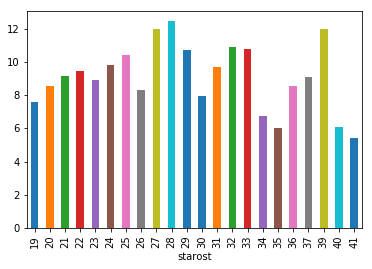

In [43]:
igralci.groupby('starost')['tocke'].mean().plot(kind='bar')

Po pričakovanjih število doseženih točk narašča vse do osemindvajsetega leta, kjer doseže maksimum, saj so igralci v teh letih dovolj izkušeni in telesno najbolje pripravljeni. S starostjo število točk zopet upada, saj igralci izgubljajo na telesni pripravljenosti, zato vedno težje konkurirajo mlajšim in hitrejšim igralcem. 

Edina velika anomalija se pojavi pri igralcih starih devetintrideset let, zato si bomo to ogledali bolj podrobno.

In [44]:
igralci[igralci.starost == 39]

,ime,pozicija,starost,odigrane_tekme,prva_postava,...,ukradene_zoge,blokade,izgubljene_zoge,osebne_napake,tocke
371,Dirk Nowitzki,C,39,77,77,...,0.6,0.6,0.7,1.9,12.0


Kot vidimo, je v tej kategoriji le en igralec, ki je bil v svojih najboljših letih najboljši igralec lige, zato je njegovo odstopanje od povprečja pričakovano.

Sedaj si bomo pogledali, ali imajo starejši igralci višji procent zadetih metov.

(0.35, 0.55)

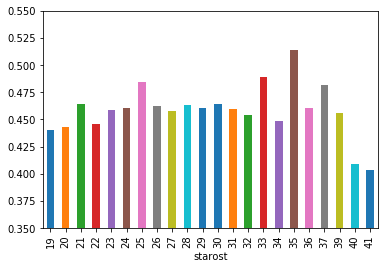

In [5]:
plt = igralci.groupby('starost')['procent_metov'].mean().plot(kind='bar')
plt.set_ylim(0.35, 0.55)

Najprej opazimo, da imajo najmlajši igralci, stari 19 in 20, opazno slabši procent metov od starejših igralcev. Za njihov slabši procent metov je več vzrokov. 

Ti igralci so novinci v ligi in se zaradi pomanjkanja izkušenj večkrat odločajo za težje mete. 
Pred ligo NBA so igrali v srednješolskih in študentskih ligah, kjer je obramba mnogo šibkejša in manj fizična, zato se morajo privaditi na obrambo lige NBA.

Preostanek grafa je brez večjih posebnosti in naša hipoteza, da imajo starejši igralci večji procent zadetih metov, propade, saj imajo le novinci probleme, ko pa se navadijo na bolj fizično obrambo, njihov procent metov ne narašča več.

Opazen padec je le pri igralcih v štiridesetih letih, kar si razlagamo z njihovo slabšo telesno pripravljenostjo.

Edini večji skok je pri igralcih starih 35, 33 in 25 let. Sklepamo, da je v teh starostnih skupinah več igralcev, ki igrajo na poziciji centra. 


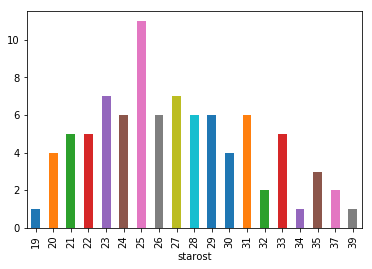

In [60]:
centri = igralci[igralci.pozicija == 'C'].groupby('starost')['pozicija']
centri.size().plot.bar()


Kot vidimo, je v starostni skupini petindvajsetletnikov največ centrov izmed vseh starostnih skupin, zato je večji procent zadetih metov te starostne skupine povsem upravičen. Zakaj je temu tako, je opisano v nadaljevanju projekta.

In [4]:
igralci_z_najboljšim_metom = igralci.sort_values('procent_metov', ascending=False)[['ime','procent_metov', 'tocke']][:10]
igralci_z_največ_točkami = igralci.sort_values('tocke', ascending=False)[['ime','procent_metov', 'tocke']][:10]
igralci_z_največ_točkami 

,ime,procent_metov,tocke
193,James Harden,0.449,30.4
121,Anthony Davis,0.534,28.1
247,LeBron James,0.542,27.5
15,Giannis Antetokounmpo,0.529,26.9
297,Damian Lillard,0.439,26.9
119,Stephen Curry,0.495,26.4
142,Kevin Durant,0.516,26.4
507,Russell Westbrook,0.449,25.4
111,DeMarcus Cousins,0.470,25.2
57,Devin Booker,0.432,24.9


In [62]:
igralci_z_najboljšim_metom 

,ime,procent_metov,tocke
538,Ante Zizic,0.731,3.7
55,Andrew Bogut,0.680,1.6
424,Willie Reed,0.669,4.6
406,Jakob Poeltl,0.659,6.9
84,Clint Capela,0.652,13.9
93,Tyson Chandler,0.647,6.5
267,DeAndre Jordan,0.645,12.0
333,Salah Mejri,0.642,3.5
195,Montrezl Harrell,0.635,11.0
2,Steven Adams,0.629,13.9


Opazimo, da ni igralca, ki bi bil hkrati med desetimi najboljšimi v doseženih točkah in v procentu metov.
Zanima nas, zakaj je temu tako, zato natančneje preučimo te igralce.

In [14]:
vsi_podatki_igralcev_z_največjim_izkoristkom = pd.merge(igralci, igralci_z_najboljšim_metom )
vsi_podatki_igralcev_z_največjim_izkoristkom

,ime,pozicija,starost,odigrane_tekme,...,blokade,izgubljene_zoge,osebne_napake,tocke
0,Steven Adams,C,24,76,...,1.0,1.7,2.8,13.9
1,Andrew Bogut,C,33,23,...,0.6,0.8,1.7,1.6
2,Clint Capela,C,23,74,...,1.9,1.4,2.5,13.9
3,Tyson Chandler,C,35,46,...,0.6,1.3,2.3,6.5
4,Montrezl Harrell,C,24,76,...,0.7,0.9,1.9,11.0
5,DeAndre Jordan,C,29,77,...,0.9,1.8,2.6,12.0
6,Salah Mejri,C,31,61,...,1.1,0.6,2.0,3.5
7,Jakob Poeltl,C,22,82,...,1.2,1.0,2.6,6.9
8,Willie Reed,C,27,42,...,0.5,0.5,1.3,4.6
9,Ante Zizic,C,21,32,...,0.4,0.3,0.9,3.7


Takoj opazimo, da prav vsi strelsko najbolj učinkoviti igralci igrajo na poziciji centra. Njihovi meti so iz neposredne bližine koša, zato jih je toliko lažje zadeti.

Text(0, 0.5, 'Meti za tri točke')

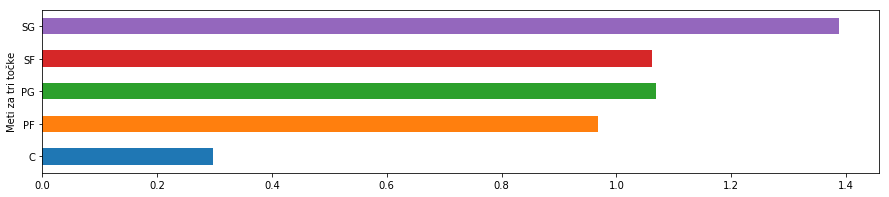

In [6]:
igr = igralci.groupby('pozicija').mean()['meti_za_tri'].plot(kind='barh', figsize=(15,3))
igr.set_ylabel('Meti za tri točke')

Graf potrdi našo domnevo, da centri mečejo lažje mete od igralcev na ostalih pozicijah, saj vržejo skoraj nično število trojk na tekmo, kar pomeni, da je velika večina njihovih metov iz neposredne bližine obroča.

# Sedaj bomo vključili še podatke s plačami igralcev in pričeli z iskanjem najbolj zaželjenih igralcev.

In [15]:
plače = pd.read_csv('obdelani-podatki/place_igralcev.csv' )
podatki_s_plačami = pd.merge(igralci, plače)
podatki_s_plačami['dnevna_placa'] = (podatki_s_plačami.placa // 365)
podatki_s_plačami

,ime,pozicija,starost,odigrane_tekme,...,osebne_napake,tocke,placa,dnevna_placa
0,Alex Abrines,SG,24,75,...,1.7,4.7,5725000,15684
1,Steven Adams,C,24,76,...,2.8,13.9,22471910,61566
2,Bam Adebayo,C,20,69,...,2.0,6.9,2955840,8098
3,LaMarcus Aldridge,C,32,75,...,2.1,23.1,21461010,58797
4,Jarrett Allen,C,19,72,...,2.0,8.2,2034120,5572
5,Al-Farouq Aminu,PF,27,69,...,2.0,9.3,7319035,20052
6,Justin Anderson,SF,24,38,...,1.4,6.2,2516048,6893
...,...,...,...,...,...,...,...,...,...
276,Delon Wright,PG,25,69,...,1.2,8.0,2536898,6950
277,Guerschon Yabusele,PF,22,33,...,0.7,2.4,2247480,6157


Za bolj nazorno predstavo o astronomskih plačah, ki jih prejemajo igralci, smo dodali stolpec z dnevnimi plačami igralcev.

In [16]:
povprecna_dnevna_placa = podatki_s_plačami['dnevna_placa'].mean().round(0)
print(f'Povprečna dnevna plača v ligi NBA znaša {povprecna_dnevna_placa} $ ')

Povprečna dnevna plača v ligi NBA znaša 24111.0 $ 


In [17]:
podatki_s_plačami[((podatki_s_plačami.tocke > 20) & (podatki_s_plačami.skok > 5) & (podatki_s_plačami.podaje > 5))]

,ime,pozicija,starost,odigrane_tekme,...,osebne_napake,tocke,placa,dnevna_placa
59,DeMarcus Cousins,C,27,48,...,3.8,25.2,18063850,49490
64,Stephen Curry,PG,29,51,...,2.2,26.4,37457154,102622
107,Blake Griffin,PF,28,58,...,2.4,21.4,32088932,87914
108,James Harden,SG,28,72,...,2.3,30.4,28299399,77532
268,Russell Westbrook,PG,29,80,...,2.5,25.4,28530608,78166


To so statistično najbolj vsestranski igralci, saj dosegajo visoko povprečje v treh najpomembnejših statističnih kategorijah.
Zaradi tega bi jih lahko šteli med najbolj zaželjene igralce.

Takšen zakjuček je prehiter, saj smo se omejili zgolj na tri statistične kategorije, ki so sicer zelo pomembne, a ne povedo vsega. Za prikaz resnične učinkovitosti igralca se največkrat uporablja index PER, ki se izračuna po izjemno zapleteni formuli, ki upošteva vse, od osebne statistike igralca, do uspešnosti ekipe pri kateri igralec igra. Indeksa PER namenoma nismo vključili v našo raziskavo, saj verjamemo, da ni indeksa, ki bi lahko pravilno upošteval ves doprinos igralca na igrišču in izven njega, a se vendarle strinjamo, da je indeks PER najboljši približek realni učinkovitosti igralca.

Poskusili bomo sestaviti svojo formulo za izračun uspešnosti igralca in na podlagi te formule poiskali najbolj zaželjene igralce.

### Izračun indeksa igralcev

In [22]:
def izracunaj_indeks(osebe): 
    osebe['indeks'] = (osebe.tocke  
    + (osebe.procent_metov - 0.5) * 5 + (osebe.podaje - 4) * 5 
    - (osebe.osebne_napake) * 5 + (osebe.skok) * 3 
    - osebe.izgubljene_zoge * 5 - osebe.dnevna_placa / 10000).round(2)
    

izracunaj_indeks(podatki_s_plačami)
podatki_s_plačami.sort_values('indeks') 

,ime,pozicija,starost,odigrane_tekme,...,tocke,placa,dnevna_placa,indeks
171,Ian Mahinmi,C,31,77,...,4.8,15944154,43682,-24.99
216,Quincy Pondexter,SF,29,23,...,2.0,3853931,10558,-22.03
86,Terrance Ferguson,SG,19,61,...,3.1,1785000,4890,-21.92
96,Marcus Georges-Hunt,SG,23,42,...,1.4,1312611,3596,-21.57
0,Alex Abrines,SG,24,75,...,4.7,5725000,15684,-20.89
242,Jason Smith,C,31,33,...,3.4,5450000,14931,-20.84
245,Caleb Swanigan,PF,20,27,...,2.3,1465920,4016,-20.60
...,...,...,...,...,...,...,...,...,...
9,Giannis Antetokounmpo,PF,23,75,...,26.9,24157303,66184,23.93
162,Damian Lillard,PG,27,73,...,26.9,26153057,71652,23.93


Glede na našo formulo za izračun indeksa, so to najbolj in najmanj zaželjeni igralci. 

Opazimo, da med najbolj zaželjenimi igralci po številu točk izstopata Ben Simmons in Chris Paul. Torej imata indeks tako visok zaradi drugih prvin. Pri Benu opazimo, da ima več kot trikrat nižjo plačo od vseh ostalih najbolj zaželjenih igralcev, kar mu dviguje indeks, saj je zaradi nižje plače bolj privlačen za ekipe. 

### Zaključek

Kljub vsem statističnim podatkom, ki so na voljo, moramo na vse indekse gledati z rahlim zadržkom, kajti v košarki je ogromno prvin, ki jih je zelo težko izmeriti. Igra v obrambi, odnos igralca, kompatibilnost igralca in ekipe so le ene od mnogih reči, ki močno vplivajo na uspešnost ekipe, a jih je skoraj nemogoče izmeriti. Indeksi lahko pomagajo zožiti izbor igralcev, ki si jih ekipe želi,